Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Learning started.
Epoch: 01 loss =  0.425422086
Epoch: 02 loss =  0.087821482
Epoch: 03 loss =  0.0660

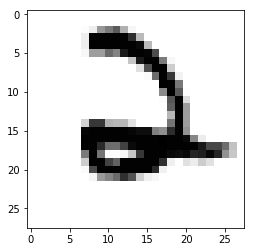

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
learning_rate = 0.001
training_epochs = 15
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 28*28])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1_relu = tf.nn.relu(L1)
L1_maxpool = tf.nn.max_pool(L1_relu, ksize=[1,2,2,1],
                           strides=[1,2,2,1], padding='SAME')
L1_dp = tf.nn.dropout(L1_maxpool, keep_prob)
print(L1)
print(L1_relu)
print(L1_maxpool)
print(L1_dp)

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1_dp, W2, strides=[1,1,1,1], padding='SAME')
L2_relu = tf.nn.relu(L2)
L2_maxpool = tf.nn.max_pool(L2_relu, ksize=[1,2,2,1],
                           strides=[1,2,2,1], padding='SAME')
L2_dp = tf.nn.dropout(L2_maxpool, keep_prob)
print(L2)
print(L2_relu)
print(L2_maxpool)
print(L2_dp)

W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
L3 = tf.nn.conv2d(L2_dp, W3, strides=[1,1,1,1], padding='SAME')
L3_relu = tf.nn.relu(L3)
L3_maxpool = tf.nn.max_pool(L3_relu, ksize=[1,2,2,1],
                           strides=[1,2,2,1], padding='SAME')
L3_dp = tf.nn.dropout(L3_maxpool, keep_prob)
print(L3)
print(L3_relu)
print(L3_maxpool)
print(L3_dp)

L3_flat = tf.reshape(L3_dp, [-1, 4*4*128])

W4 = tf.get_variable('W4', shape = [4*4*128, 256],
                    initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([256]))
L4 = tf.matmul(L3_flat, W4) + b4

W5 = tf.get_variable('W5', shape = [256, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('Learning started.')
for epoch in range(training_epochs):
    avg_loss = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        x, y = mnist.train.next_batch(batch_size)
        feed = {X: x, Y:y, keep_prob: 0.7}
        _, l = sess.run([optimizer, loss], feed)
        avg_loss += l/total_batch
    print('Epoch:', '%02d'%(epoch+1), 'loss = ', '{:.9f}'.format(avg_loss))
print('Learning ended.')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, {X:mnist.test.images, Y:mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), {X:mnist.test.images[r:r+1], keep_prob: 1}))
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
          cmap = 'Greys', interpolation = 'nearest')
plt.show()